## Install Mudi

In the future, `mudi` will be distributed via PyPi. For now, install as follows in `/PATH_TO_DIR/mudi/`:

```python

pip install -e .

```

In [1]:
import os
import pandas as pd
import scanpy as sc

In [2]:
DATA_DIR = '/home/sanand/gtex_single_cell/eli'

#### Load Metadata

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, 'ref', 'ten_sample_metadata.tsv'), sep='\t')
df.head(2)

,Unnamed: 0,gtex_sample_id,path_to_bcl_platform,flowcell_id,raw_path,filt_path,cb,dup,sample
0,1,GTEX-13VXT-5007-SM-IFRQQ_2,/seq/illumina/proc/SL-NXA/190307_SL-NXA_1180_A...,190307_SL-NXA_1180_AHTL5VBGX9,../LV/sample_matrices/GTEX-13VXT-5007-SM-IFRQQ...,../LV/sample_matrices/GTEX-13VXT-5007-SM-IFRQQ...,./cellbender/heart_gtex_sc/GTEX-13VXT-5007-SM-...,2,GTEX-13VXT-5007-SM-IFRQQ
1,12,GTEX-15RJ7-5001-SM-IFRQS_1,/seq/illumina/proc/SL-NXA/190307_SL-NXA_1180_A...,190307_SL-NXA_1180_AHTL5VBGX9,../LV/sample_matrices/GTEX-15RJ7-5001-SM-IFRQS...,../LV/sample_matrices/GTEX-15RJ7-5001-SM-IFRQS...,./cellbender/heart_gtex_sc/GTEX-15RJ7-5001-SM-...,1,GTEX-15RJ7-5001-SM-IFRQS


#### Get List of Input Matrices

In [4]:
file_names = [
    os.path.join(DATA_DIR, 'analysis','cellbender','heart_gtex_sc', x) for 
    x in 
    os.listdir(os.path.join(DATA_DIR, 'analysis','cellbender','heart_gtex_sc'))
]

print("Example output .h5 file from cellbender: \n{}".format(file_names[0]))

Example output .h5 file from cellbender: 
/home/sanand/gtex_single_cell/eli/analysis/cellbender/heart_gtex_sc/GTEX-12WSN-5001-SM-IFRQO_2_out_filtered.h5


### Using Mudi

In [5]:
from mudi.process import recipe

In [8]:
adata = recipe(
    file_names,
    min_genes=200,
    min_cells=3,
    thresh=2.25,
    mito_thresh='auto',
    verbose=True,
    bbknn='batch'
)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Combining 20 inputs.


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Vari

	Filtering louvain group 5 - percent_mito < 0.0332744256593287
	Filtering louvain group 15 - percent_mito < 0.011894423747435212
	Filtering louvain group 2 - percent_mito < 0.041448038537055254
	Filtering louvain group 17 - percent_mito < 0.3056892603635788
	Filtering louvain group 6 - percent_mito < 0.449832646176219
	Filtering louvain group 11 - percent_mito < 0.015260132611729205
	Filtering louvain group 1 - percent_mito < 0.05969974352046847
	Filtering louvain group 16 - percent_mito < 0.012344512506388128
	Filtering louvain group 19 - percent_mito < 0.12970580626279116
	Filtering louvain group 18 - percent_mito < 0.09601483540609479
	Filtering louvain group 7 - percent_mito < 0.043180296663194895
	Filtering louvain group 12 - percent_mito < 0.36012990586459637
	Filtering louvain group 0 - percent_mito < 0.05226040165871382
	Filtering louvain group 3 - percent_mito < 0.04285350791178644
	Filtering louvain group 8 - percent_mito < 0.030018831370398402
	Filtering louvain group 10 - p

Trying to set attribute `.obs` of view, making a copy.


Filtered 7694 / 102631 barcodes.


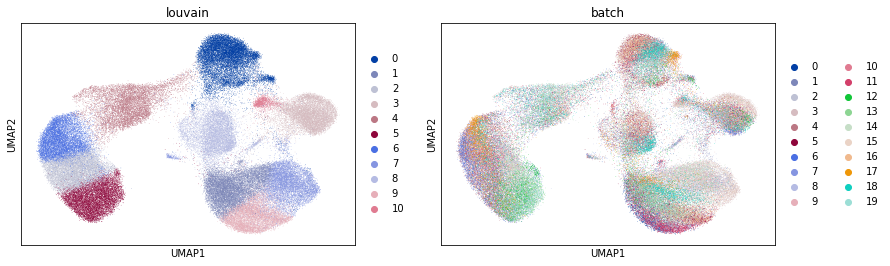

In [31]:
sc.pl.umap(adata, color=['louvain','batch'])

### Labeling Cell Types

This process is imperfect and is meant for a quick, rapid assignment for known markers. It is based on differentially expressed genes. It requires an annotated dataframe.

In [ ]:
from mudi.markers import build_marker_set, labeler, sub_cluster_and_rename

In [34]:
heart_markers = pd.read_csv(os.path.join(DATA_DIR, 'ref/gtex_heart_markers.tsv'),sep='\t')

In [45]:
# Find marker genes
sc.tl.rank_genes_groups(adata, groupby='louvain')

# Build marker set
scores, aggr, labels = build_marker_set(adata, heart_markers, thresh=1e-2)

/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:

In [48]:
scores

,T cell (CD4),T cell,Lymphocytes,NK Cell,B cell,T cell (Activated),Conduction Cell,Smooth Muscle,Monocytes (FCGR3A+),Vascular Endothelial,...,Myocardial Pericyte,T cell (CD8),B memory,Fibroblast,Monocytes (CD14+),Dendritic Cell,Ventricular Myocyte,Mast Cell,Lymphatic Endothelial,Myofibroblast
0,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,537.55481,...,-1.000000,-1.000000,-1.0,-1.000000,-1.00000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000
1,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.00000,...,19.036987,-1.000000,-1.0,344.075928,-1.00000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000
10,30.607677,-1.0,32.893520,27.139885,-1.0,12.863115,-1.0,-1.000000,-1.0,-1.00000,...,-1.000000,9.424625,-1.0,-1.000000,-1.00000,-1.0,-1.000000,9.611589,-1.000000,-1.000000
2,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.00000,...,-1.000000,-1.000000,-1.0,-1.000000,-1.00000,-1.0,1225.753418,-1.000000,-1.000000,73.379990
3,-1.000000,-1.0,54.914539,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.00000,...,-1.000000,-1.000000,-1.0,-1.000000,41.83128,-1.0,-1.000000,-1.000000,51.022366,-1.000000
4,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,82.315918,-1.0,-1.00000,...,-1.000000,-1.000000,-1.0,-1.000000,-1.00000,-1.0,1593.031860,-1.000000,-1.000000,-1.000000
5,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.00000,...,-1.000000,-1.000000,-1.0,-1.000000,-1.00000,-1.0,691.038818,-1.000000,-1.000000,34.130413
6,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.00000,...,-1.000000,-1.000000,-1.0,-1.000000,-1.00000,-1.0,1350.091919,-1.000000,-1.000000,105.678673
7,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.00000,...,-1.000000,-1.000000,-1.0,866.345459,-1.00000,-1.0,-1.000000,-1.000000,-1.000000,135.602722
8,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,158.113663,-1.0,-1.00000,...,227.969345,-1.000000,-1.0,-1.000000,-1.00000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000


In [49]:
aggr.head(20)

,cluster,no.,names,scores,pvals,pvals_adj,logfoldchanges,cell_type,label
1002,10,2,IL7R,30.607677,4.278268e-154,3.483224e-150,7.307844,T cell (CD4),Lymphocytes
318,3,18,PTPRC,54.914539,0.000000e+00,0.000000e+00,4.656402,Lymphocytes,Macrophage
1000,10,0,PTPRC,32.893520,2.767178e-178,3.379416e-174,5.352848,Lymphocytes,Lymphocytes
1013,10,13,GNLY,15.582691,3.799238e-50,1.254005e-47,6.185925,NK Cell,Lymphocytes
1045,10,45,NKG7,11.557194,2.064035e-29,2.344840e-27,6.111104,NK Cell,Lymphocytes
1030,10,30,CD247,12.863115,1.287177e-35,2.178171e-33,6.636796,T cell (Activated),Lymphocytes
464,4,64,MYL9,82.315918,0.000000e+00,0.000000e+00,3.568174,Smooth Muscle,Ventricular Myocyte
818,8,18,GUCY1A2,52.067986,0.000000e+00,0.000000e+00,4.871162,Smooth Muscle,Myocardial Pericyte
825,8,25,ACTA2,45.308418,0.000000e+00,0.000000e+00,4.166457,Smooth Muscle,Myocardial Pericyte
859,8,59,MYH11,30.466976,6.491649e-195,9.727518e-193,3.397818,Smooth Muscle,Myocardial Pericyte


In [50]:
labels

{'0': 'Vascular Endothelial',
 '1': 'Fibroblast',
 '10': 'Lymphocytes',
 '2': 'Ventricular Myocyte',
 '3': 'Macrophage',
 '4': 'Ventricular Myocyte',
 '5': 'Ventricular Myocyte',
 '6': 'Ventricular Myocyte',
 '7': 'Fibroblast',
 '8': 'Myocardial Pericyte',
 '9': 'Fibroblast'}

In [42]:
# Assign cell-type
adata.obs['cell_type'] = adata.obs['louvain'].apply(lambda x: labeler(labels,x))

/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/sanand/.conda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:

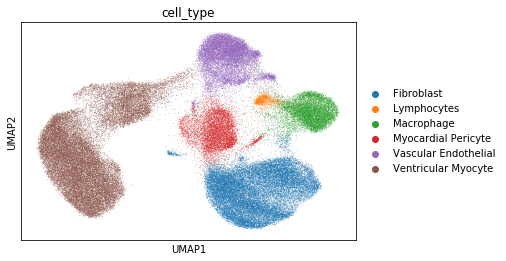

In [44]:
sc.pl.umap(adata, color=['cell_type'])

### Sub-clustering

Subclsutering can be done using the function `sub_cluster_and_rename` to fine-tune annotations rapidly:

```python

genes_df = sub_cluster_and_rename(adata, 'louvain', ['Myocardial Perciyte'], heart_markers)

```

For example, in the above example we have the red clsuter annotated as `Myocardial Perciyte`, but if we subcluster we see that there is likely some smooth muscle or adipocyte character in the small cluster to the side.

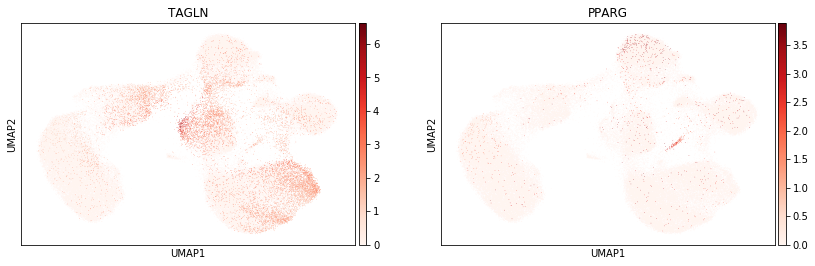

In [56]:
sc.pl.umap(adata, color=['TAGLN','PPARG'], cmap='Reds')

In [57]:
adata

AnnData object with n_obs × n_vars = 94937 × 24425 
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'scrublet_score', 'doublet', 'percent_mito', 'percent_ribo', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain', 'cell_type'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-19', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'batch_colors', 'rank_genes_gro

In [ ]:
# Save
sc.write('heart_ten_samples.h5ad', adata)